# Test of the first vector of features

In [1]:
import numpy as np
from ml_helpers import ml_helpers
from redis_management import RedisManagement as rmgt
from collections import OrderedDict

In [2]:
mat = np.load('matrix_first_vector.npy')
redis_h = rmgt('malwares')
ml_h= ml_helpers(redis_h.redis_client)
mat.shape


(724, 5)

In [3]:
from sklearn.cluster import KMeans
help(KMeans)

Help on class KMeans in module sklearn.cluster.k_means_:

class KMeans(sklearn.base.BaseEstimator, sklearn.base.ClusterMixin, sklearn.base.TransformerMixin)
 |  K-Means clustering
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, optional, default: 8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random' or an ndarray}
 |      Method for initialization, defaults to 'k-means++':
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose k observations (rows) at random from data for
 |      the initial centroids.
 |  
 |      If an ndarray is passed, it should be of shape (n_clusters, n_features)
 |      and gives the initial centers.
 |  
 |  n_init : int, default: 10
 |      Number of time t

In [66]:
k_means = KMeans(n_clusters=90,n_jobs=8,precompute_distances=False)

In [67]:
kmeans_result = k_means.fit(mat)

In [68]:
k_means.labels_

array([41,  8,  8, 31,  8,  8, 11, 44,  8,  8,  8, 32,  8, 66, 64, 30, 33,
        8, 61,  8,  8, 70, 44, 40, 50,  8,  8,  8,  8,  8, 70,  8, 46,  8,
       31, 50,  8, 64, 35,  8,  8, 21, 57,  8, 53,  8,  8,  8, 69,  8,  8,
        8, 69,  8,  8,  8,  8, 87, 85,  8,  5,  8,  8, 52,  8, 75,  8,  8,
       38,  8,  8, 14,  8,  8,  8,  8, 23, 72,  8, 86, 32,  8, 32, 75,  8,
        8,  8,  8,  8, 69,  8,  8,  8, 44,  8,  8,  8,  0, 64, 46,  8,  8,
       46,  8,  8,  8, 40,  8,  8,  8,  8, 17, 28,  8, 78,  8, 50,  8,  8,
        8, 46,  8, 30,  0,  8, 46,  8,  4, 31,  9,  8, 38,  8, 83, 27, 39,
        9, 86, 20,  8,  0,  8, 76, 19,  8,  8, 79, 11, 56,  8,  8,  8,  8,
       63,  8, 27,  8,  8,  9,  8, 71,  8, 50,  8,  8,  8, 64,  8,  8,  8,
        8, 14,  8, 64, 46,  8,  8,  8, 41,  2,  8,  8, 54,  8,  8,  8, 62,
        8, 31, 45,  8, 56,  8,  8,  0,  8, 68,  8,  8, 68,  8, 85,  8,  8,
        8,  8,  8,  8,  8,  8,  8, 57,  7, 89, 84,  8,  8, 49, 79,  8, 17,
       49,  8, 60, 15, 46

In [69]:
k_means.cluster_centers_

array([[  2.48896000e+05,   4.62500000e+00,   5.75471617e+00,
          1.43250000e+02,   1.37500000e+00],
       [  4.19880960e+07,   5.00000000e+00,   3.27794783e+00,
          2.40000000e+01,   1.00000000e+00],
       [  4.33856033e+06,   4.00000000e+00,   5.72143098e+00,
          2.81000000e+02,   0.00000000e+00],
       [  1.33708800e+07,   7.00000000e+00,   4.95784633e+00,
          4.10000000e+01,   0.00000000e+00],
       [  1.63862400e+06,   5.00000000e+00,   4.12444944e+00,
          1.55000000e+02,   0.00000000e+00],
       [  5.25566667e+04,   5.00000000e+00,   4.53581156e+00,
          2.20000000e+01,   0.00000000e+00],
       [  8.02095500e+05,   4.00000000e+00,   4.43255902e+00,
          5.95000000e+01,   0.00000000e+00],
       [  3.16825600e+06,   4.00000000e+00,   6.28716055e+00,
          4.45333333e+02,   0.00000000e+00],
       [  1.84330476e+05,   4.99488491e+00,   5.12623189e+00,
          1.31015345e+02,  -9.99200722e-16],
       [  4.26992000e+05,   5.2000000

In [70]:
labels = kmeans_result.labels_.tolist()

In [71]:
all_malwares = ml_h.get_all_malwares
all_malwares

[b'0008065861f5b09195e51add72dacd3c4bbce6444711320ad349c7dab5bb97fb',
 b'003315b0aea2fcb9f77d29223dd8947d0e6792b3a0227e054be8eb2a11f443d9',
 b'00b58e4f8525161379681c1532f83e7b85f432933d35dc139ec85bb680ddf633',
 b'01259a104a0199b794b0c61fcfc657eb766b2caeae68d5c6b164a53a97874257',
 b'022224bfad26bab87cf5f4b17981a4224ef8fa6919520b3bc2946234efda1e11',
 b'0269085bb03ba9030209b0d95f0dd65f80539c27ea376eb2a8f11c68bf60cb8a',
 b'03641e5632673615f23b2a8325d7355c4499a40f47b6ae094606a73c56e24ad0',
 b'036e4f452041f9d573f851d48d92092060107d9ea32e0c532849d61a598b8a71',
 b'037bdc95919b1d3d65af6202e8c9c9ca3caba7a863e4e39162b93fa032881feb',
 b'0404b8957c27de20bebb133d3cf0a28e30700f667f7c2f3fe7fde7e726b691cd',
 b'043eec3e120c34cd0ac6c954c2ee6dd533a0a647367ee2ca2d5a508a4a8ac75c',
 b'0442cfabb3212644c4b894a7e4a7e84c00fd23489cc4f96490f9988e6074b6ab',
 b'045f0ecae2362355f06d4fc8fa97e577daad1e01e6f0c0523b5b0f9e15306c74',
 b'048621ecf8f25133b2b09d512bb0fe15fc274ec7cb2ccc966aeb44d7a88beb5b',
 b'05455efecab4a7931

In [72]:
for index,l in enumerate(labels):
    ml_h.set_label(all_malwares[index],'KMeans','first_vector',l)

In [73]:
distrib = {}
for m in all_malwares:
    try:
        distrib[redis_h.client.hget(m,'KMeans_first_vector')].append((m,redis_h.client.hget(m,'label')))
    except KeyError:
        distrib[redis_h.client.hget(m,'KMeans_first_vector')] = [(m,redis_h.client.hget(m,'label'))]

# First Results

In [74]:
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib as mpl
mpl.rcParams['font.size'] = 50.0

In [75]:
distrib_class_malware = { int(k):len(v) for k,v in distrib.items()}
distrib_class_malware

{0: 8,
 1: 1,
 2: 3,
 3: 1,
 4: 1,
 5: 4,
 6: 2,
 7: 3,
 8: 391,
 9: 10,
 10: 1,
 11: 3,
 12: 1,
 13: 1,
 14: 12,
 15: 2,
 16: 1,
 17: 15,
 18: 1,
 19: 4,
 20: 5,
 21: 1,
 22: 1,
 23: 3,
 24: 1,
 25: 1,
 26: 1,
 27: 2,
 28: 1,
 29: 3,
 30: 3,
 31: 12,
 32: 7,
 33: 1,
 34: 1,
 35: 2,
 36: 2,
 37: 1,
 38: 7,
 39: 2,
 40: 5,
 41: 8,
 42: 2,
 43: 2,
 44: 5,
 45: 1,
 46: 18,
 47: 1,
 48: 3,
 49: 13,
 50: 8,
 51: 2,
 52: 3,
 53: 1,
 54: 1,
 55: 1,
 56: 4,
 57: 3,
 58: 6,
 59: 3,
 60: 3,
 61: 3,
 62: 3,
 63: 2,
 64: 11,
 65: 2,
 66: 3,
 67: 4,
 68: 5,
 69: 7,
 70: 8,
 71: 2,
 72: 2,
 73: 1,
 74: 1,
 75: 6,
 76: 5,
 77: 2,
 78: 3,
 79: 4,
 80: 1,
 81: 1,
 82: 5,
 83: 2,
 84: 3,
 85: 6,
 86: 7,
 87: 7,
 88: 2,
 89: 1}

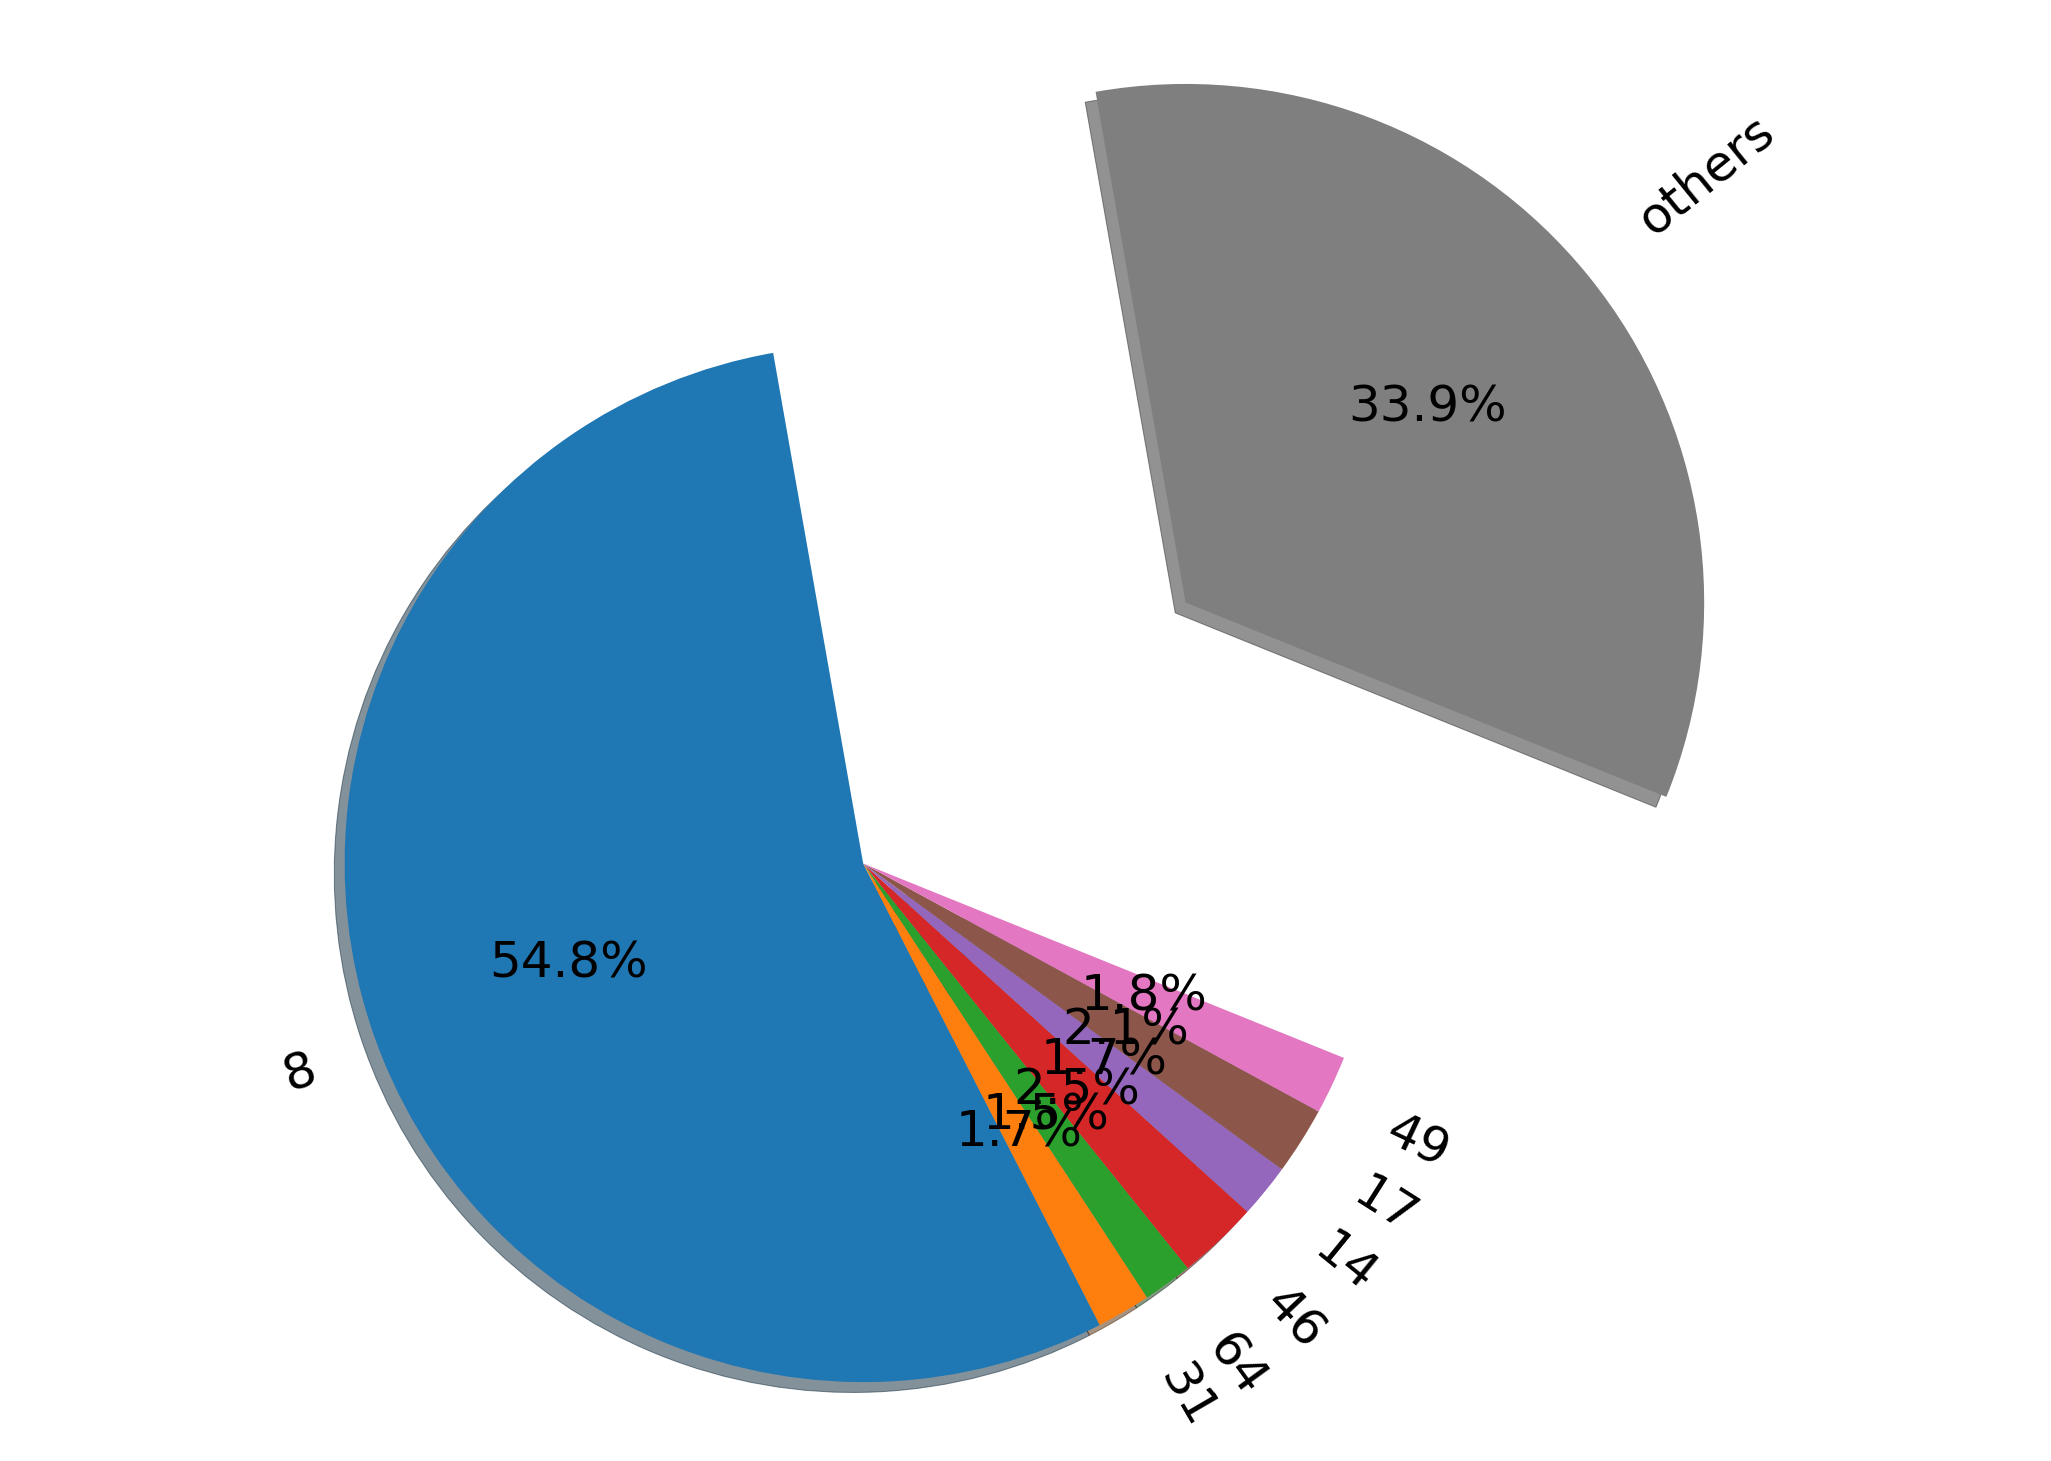

In [76]:
labels = [ str(k) for k,v in distrib_class_malware.items() if v > 10 ]

labels.append('others')
explode=[ 0 for i in range(0,len(labels))]
explode[len(labels)-1] = 0.8
fig1, ax1 = plt.subplots()

rest = sum([ v for v in distrib_class_malware.values() if v < 10])
data = [ v for v in distrib_class_malware.values() if v > 10]
data.append(rest)

ax1.pie(data ,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=100, rotatelabels =True, explode=explode)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.subplots_adjust(0.3,0,5,5)

plt.show()

In [77]:
histo = Counter( malware_fam for m,malware_fam in distrib[b'8'])
histo

Counter({b'Backdoor.MSIL.Tyupkin': 1,
         b'EquationGroup': 388,
         b'EquationGroup.Fanny': 1,
         b'Ransomware.Locky': 1})

In [78]:
[eval(redis_h.client.hget(k.decode(),'first_vector'))['size of file']for k,malware_fam in distrib[b'12']]

[4705879]

In [79]:
redis_h.client.hget('0404b8957c27de20bebb133d3cf0a28e30700f667f7c2f3fe7fde7e726b691cd','first_vector')

b"OrderedDict([('size of file', 184320), ('number of sections', 5), ('median of entropy', 5.124411051137978), ('number of imports', 131), ('number of exports', 0)])"

In [80]:
np.array(list(eval(_).values()))

array([  1.84320000e+05,   5.00000000e+00,   5.12441105e+00,
         1.31000000e+02,   0.00000000e+00])

In [81]:
np.linalg.norm(_)

184320.04669123646

In [82]:
redis_h.client.hget('003315b0aea2fcb9f77d29223dd8947d0e6792b3a0227e054be8eb2a11f443d9','first_vector')

b"OrderedDict([('size of file', 184320), ('number of sections', 5), ('median of entropy', 5.124409372381621), ('number of imports', 131), ('number of exports', 0)])"

In [83]:
np.array(list(eval(_).values()))

array([  1.84320000e+05,   5.00000000e+00,   5.12440937e+00,
         1.31000000e+02,   0.00000000e+00])

In [84]:
np.linalg.norm(_)

184320.04669123641

In [85]:
redis_h.client.hget('01259a104a0199b794b0c61fcfc657eb766b2caeae68d5c6b164a53a97874257','first_vector')

b"OrderedDict([('size of file', 24576), ('number of sections', 3), ('median of entropy', 4.096842815291052), ('number of imports', 69), ('number of exports', 0)])"

In [86]:
np.array(list(eval(_).values()))

array([  2.45760000e+04,   3.00000000e+00,   4.09684282e+00,
         6.90000000e+01,   0.00000000e+00])

In [87]:
np.linalg.norm(_)

24576.097387179296

In [88]:
redis_h.client.hget('0cfc34fa76228b1afc7ce63e284a23ce1cd2927e6159b9dea9702ad9cb2a6300','first_vector')

b"OrderedDict([('size of file', 20480), ('number of sections', 3), ('median of entropy', 4.2066124324223875), ('number of imports', 36), ('number of exports', 0)])"

In [89]:
np.array(list(eval(_).values()))

array([  2.04800000e+04,   3.00000000e+00,   4.20661243e+00,
         3.60000000e+01,   0.00000000e+00])

In [90]:
np.linalg.norm(_)

20480.0322923473

In [91]:
redis_h.client.hget('0d8c2bcb575378f6a88d17b5f6ce70e794a264cdc8556c8e812f0b5f9c709198','first_vector')

b"OrderedDict([('size of file', 17400), ('number of sections', 6), ('median of entropy', 3.8510413345401164), ('number of imports', 27), ('number of exports', 0)])"

In [92]:
np.array(list(eval(_).values()))

array([  1.74000000e+04,   6.00000000e+00,   3.85104133e+00,
         2.70000000e+01,   0.00000000e+00])

In [93]:
np.linalg.norm(_)

17400.022408908542

# Test with the second vector of features

In [94]:
import numpy as np
from ml_helpers import ml_helpers
from redis_management import RedisManagement as rmgt
from collections import OrderedDict
from collections import Counter

In [95]:
redis_h = rmgt('malwares')
ml_h= ml_helpers(redis_h.redis_client)
mat_second_mat = np.load('matrix_second_vector.npy')
mat_second_mat


array([[ 0.00253634,  0.6       ,  0.4862403 ,  0.16464471,  0.1147541 ],
       [ 0.00438982,  0.5       ,  0.77212832,  0.2270364 ,  0.        ],
       [ 0.00438982,  0.5       ,  0.78399491,  0.2270364 ,  0.        ],
       ..., 
       [ 0.00315832,  0.6       ,  0.69909529,  0.37608319,  0.09836066],
       [ 0.00226807,  0.3       ,  0.78924532,  0.0797227 ,  0.        ],
       [ 0.00438982,  0.5       ,  0.77212852,  0.2270364 ,  0.        ]])

In [96]:
from sklearn.cluster import KMeans

In [97]:
k_m = KMeans(n_clusters=90,n_jobs=8,precompute_distances=False)
k_m.fit(mat_second_mat)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=90, n_init=10, n_jobs=8, precompute_distances=False,
    random_state=None, tol=0.0001, verbose=0)

In [98]:
k_m.labels_

array([46,  0,  0, 42,  0,  0, 19, 20,  0,  0,  0, 34,  0, 70, 60, 30, 70,
        0, 83,  0,  0, 65, 43, 10, 35,  0,  0,  0,  0,  0, 65,  0, 44,  0,
       42, 58,  0, 60, 66,  0,  0, 36, 74,  0, 24,  0,  0,  0, 10,  0,  0,
        0, 26,  0,  0,  0,  0, 48, 78,  0, 53,  0,  0, 36,  0, 13,  0,  0,
       82,  0,  0, 51,  0,  0,  0,  0, 27, 56,  0, 50, 30,  0, 27, 17,  0,
        0,  0,  0,  0, 54,  0,  0,  0, 12,  0,  0,  0, 17, 12, 56,  0,  0,
       56,  0,  0,  0, 57,  0,  0,  0,  0, 76, 60,  0, 38,  0, 26,  0,  0,
        0,  4,  0, 70, 35,  0,  4,  0, 23, 84, 19,  0, 25,  0, 17, 40, 59,
       60, 50, 10,  0, 22,  0, 36, 52,  0,  0, 52, 19, 70,  0,  0,  0,  0,
       67,  0, 76,  0,  0, 19,  0, 44,  0, 22,  0,  0,  0, 31,  0,  0,  0,
        0, 51,  0, 31, 44,  0,  0,  0, 33,  2,  0,  0,  1,  0,  0,  0, 77,
        0, 20, 26,  0, 16,  0,  0, 40,  0, 10,  0,  0, 10,  0, 13,  0,  0,
        0,  0,  0,  0,  0,  0,  0, 74, 15, 63, 79,  0,  0, 25, 23,  0, 28,
       25,  0, 86,  0, 56

In [99]:
labels = k_m.labels_.tolist()

In [100]:
all_malwares = ml_h.get_all_malwares
all_malwares

[b'0008065861f5b09195e51add72dacd3c4bbce6444711320ad349c7dab5bb97fb',
 b'003315b0aea2fcb9f77d29223dd8947d0e6792b3a0227e054be8eb2a11f443d9',
 b'00b58e4f8525161379681c1532f83e7b85f432933d35dc139ec85bb680ddf633',
 b'01259a104a0199b794b0c61fcfc657eb766b2caeae68d5c6b164a53a97874257',
 b'022224bfad26bab87cf5f4b17981a4224ef8fa6919520b3bc2946234efda1e11',
 b'0269085bb03ba9030209b0d95f0dd65f80539c27ea376eb2a8f11c68bf60cb8a',
 b'03641e5632673615f23b2a8325d7355c4499a40f47b6ae094606a73c56e24ad0',
 b'036e4f452041f9d573f851d48d92092060107d9ea32e0c532849d61a598b8a71',
 b'037bdc95919b1d3d65af6202e8c9c9ca3caba7a863e4e39162b93fa032881feb',
 b'0404b8957c27de20bebb133d3cf0a28e30700f667f7c2f3fe7fde7e726b691cd',
 b'043eec3e120c34cd0ac6c954c2ee6dd533a0a647367ee2ca2d5a508a4a8ac75c',
 b'0442cfabb3212644c4b894a7e4a7e84c00fd23489cc4f96490f9988e6074b6ab',
 b'045f0ecae2362355f06d4fc8fa97e577daad1e01e6f0c0523b5b0f9e15306c74',
 b'048621ecf8f25133b2b09d512bb0fe15fc274ec7cb2ccc966aeb44d7a88beb5b',
 b'05455efecab4a7931

In [101]:
for index,l in enumerate(labels):
    ml_h.set_label(all_malwares[index],'KMeans','second_vector',l)

In [102]:
distrib = {}
for m in all_malwares:
    try:
        distrib[redis_h.client.hget(m,'KMeans_second_vector')].append((m,redis_h.client.hget(m,'label')))
    except KeyError:
        distrib[redis_h.client.hget(m,'KMeans_second_vector')] = [(m,redis_h.client.hget(m,'label'))]

In [79]:
distrib

{b'0': [(b'003315b0aea2fcb9f77d29223dd8947d0e6792b3a0227e054be8eb2a11f443d9',
   b'EquationGroup.Fanny'),
  (b'00b58e4f8525161379681c1532f83e7b85f432933d35dc139ec85bb680ddf633',
   b'EquationGroup'),
  (b'022224bfad26bab87cf5f4b17981a4224ef8fa6919520b3bc2946234efda1e11',
   b'EquationGroup'),
  (b'0269085bb03ba9030209b0d95f0dd65f80539c27ea376eb2a8f11c68bf60cb8a',
   b'EquationGroup'),
  (b'037bdc95919b1d3d65af6202e8c9c9ca3caba7a863e4e39162b93fa032881feb',
   b'EquationGroup'),
  (b'0404b8957c27de20bebb133d3cf0a28e30700f667f7c2f3fe7fde7e726b691cd',
   b'EquationGroup'),
  (b'043eec3e120c34cd0ac6c954c2ee6dd533a0a647367ee2ca2d5a508a4a8ac75c',
   b'EquationGroup'),
  (b'045f0ecae2362355f06d4fc8fa97e577daad1e01e6f0c0523b5b0f9e15306c74',
   b'EquationGroup'),
  (b'06cd057c035acbff3e9294860053ce9ec237a166e52018b6651250fa99e1a8a0',
   b'EquationGroup'),
  (b'07d57be320708e478b4b6075928302e1bf7c15856de36adaa0c02be36282e453',
   b'EquationGroup'),
  (b'083c64c404ac1ea6df1a4cb6eafa91ef90b7abacc54

In [103]:
results={}
for k,v in distrib.items():
    c = Counter()
    for malware,label in v:
        c[label] +=1
    results[k]=c
results

{b'0': Counter({b'EquationGroup': 388,
          b'EquationGroup.Fanny': 1,
          b'Shamoon': 2}),
 b'1': Counter({b'Kelihos': 1, b'Keylogger.Ardamax': 1, b'PotaoExpress': 1}),
 b'10': Counter({b'PotaoExpress': 11}),
 b'11': Counter({b'Win32.Hupigon': 1}),
 b'12': Counter({b'AndroRat_6Dec2013': 1,
          b'PotaoExpress': 6,
          b'Rustock': 1,
          b'ZeroLocker': 1}),
 b'13': Counter({b'PotaoExpress': 3,
          b'Poweliks': 1,
          b'Win32.Stuxnet.A.Duqu-C-Media': 1,
          b'Win32.Stuxnet.B.Duqu-Realtek': 2}),
 b'14': Counter({b'VolatileCedar.Explosion': 3}),
 b'15': Counter({b'PotaoExpress': 3}),
 b'16': Counter({b'EquationGroup.GROK': 1}),
 b'17': Counter({b'Rustock': 1,
          b'Trojan.Sinowal': 8,
          b'WMIGhost': 1,
          b'Waski.Upatre': 1,
          b'Win32.Caphaw.Shylock': 1}),
 b'18': Counter({b'EquationGroup': 1, b'Neurevt.1.7.0.1': 1}),
 b'19': Counter({b'VolatileCedar.Explosion': 11}),
 b'2': Counter({b'PotaoExpress': 4}),
 b'20': C

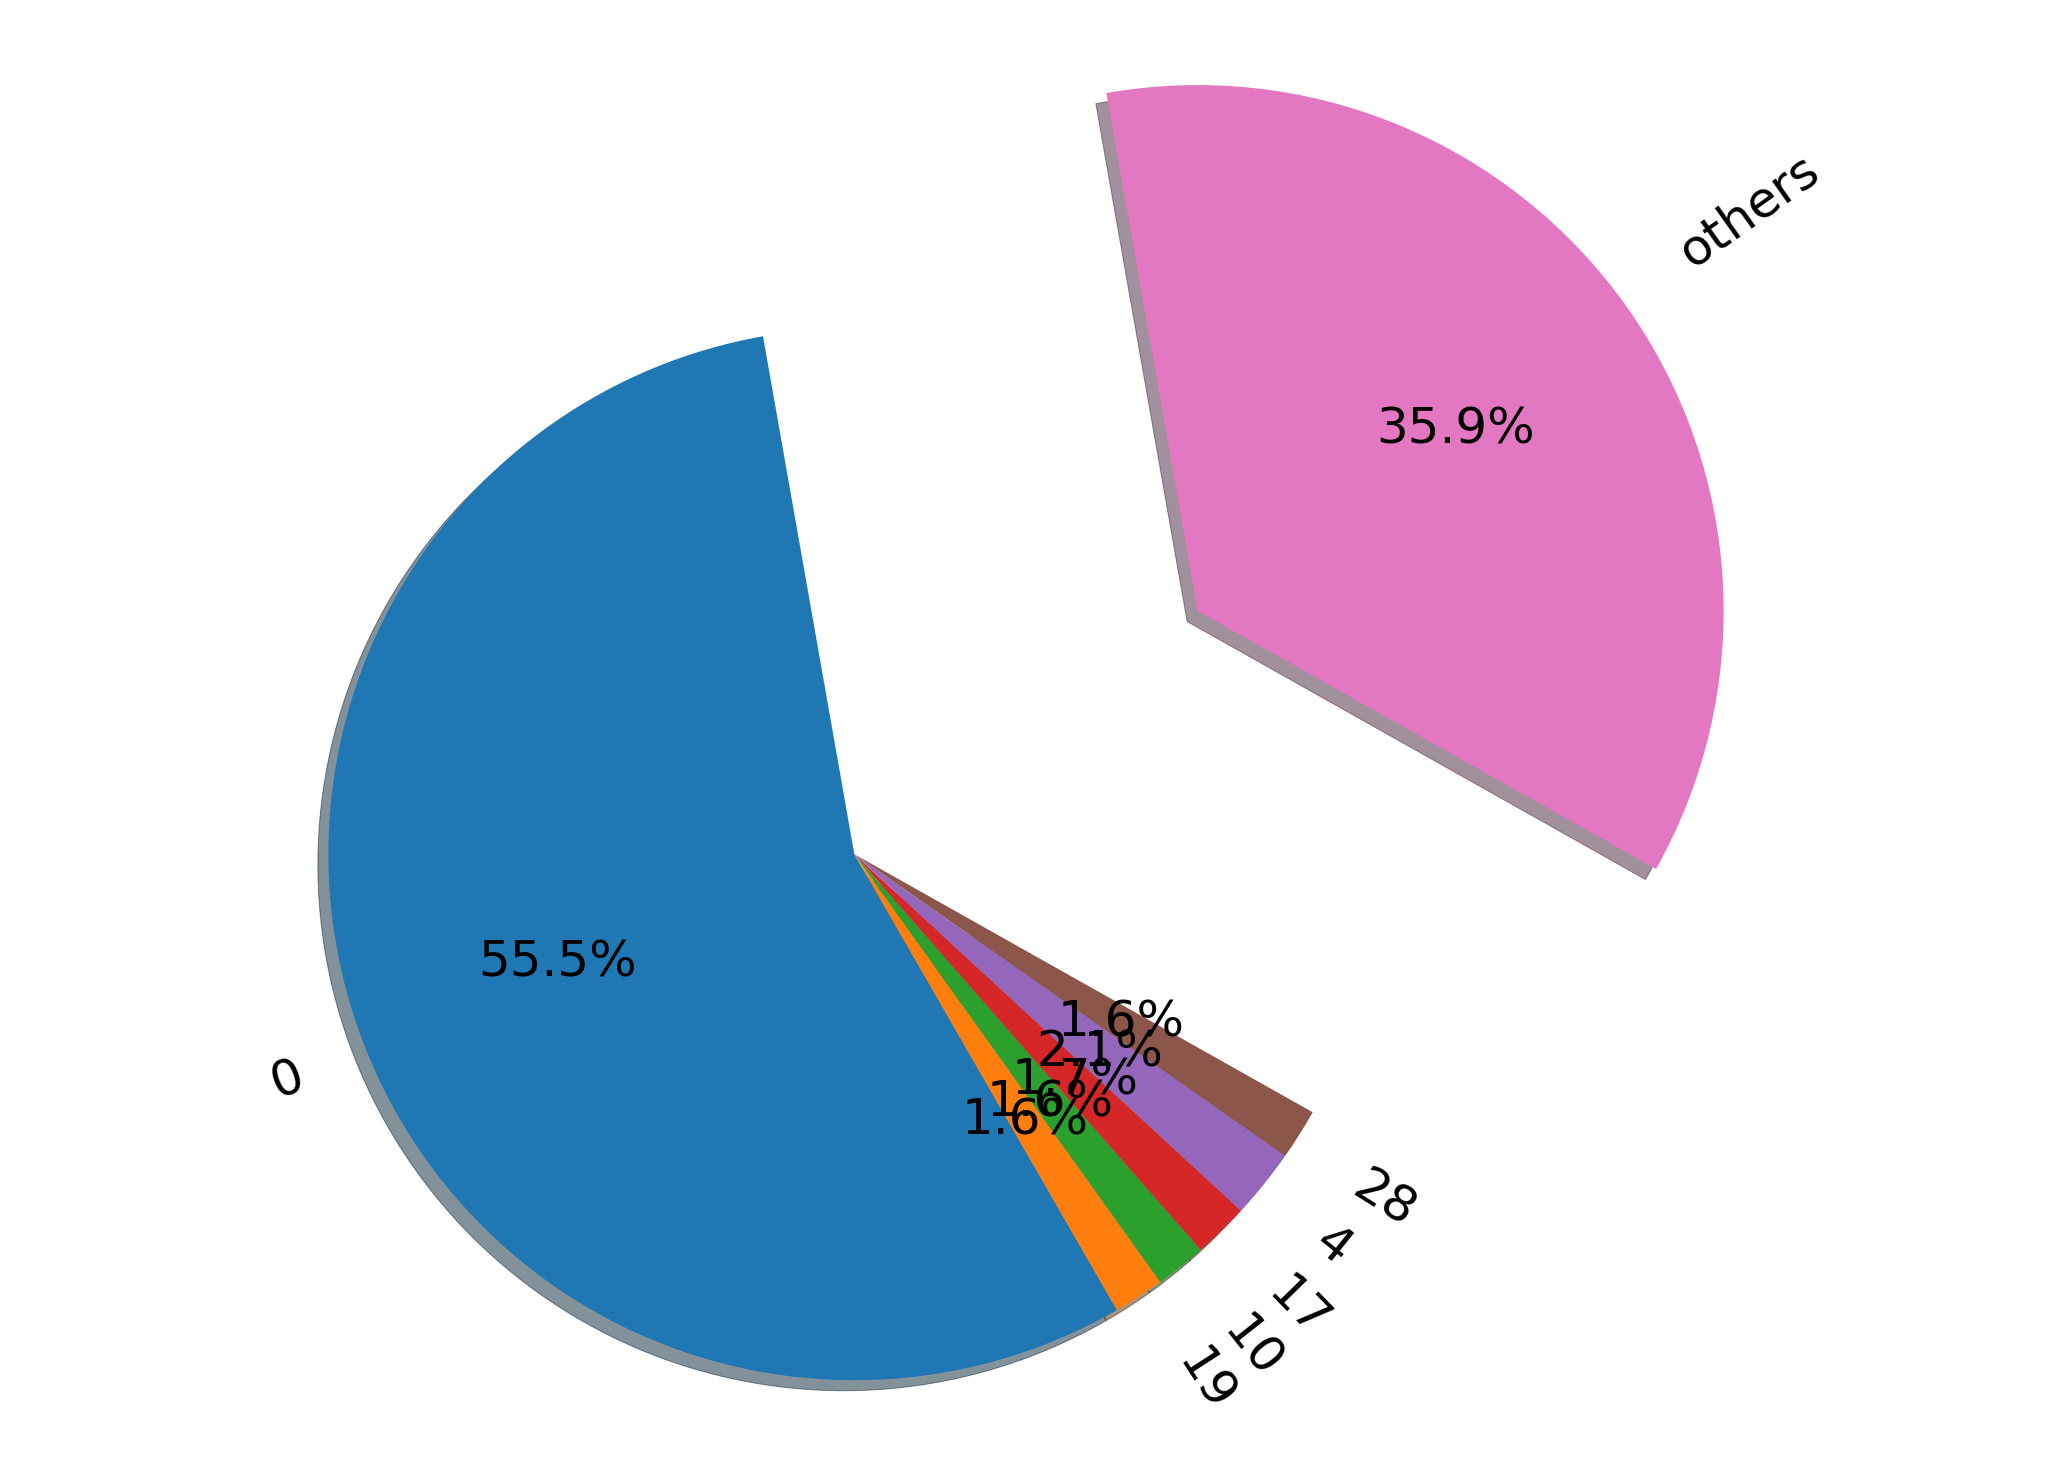

In [108]:
distrib_class_malware = { int(k):len(v) for k,v in distrib.items()}

labels = [ str(k) for k,v in distrib_class_malware.items() if v > 10 ]

labels.append('others')
explode=[ 0 for i in range(0,len(labels))]
explode[len(labels)-1] = 0.8
fig1, ax1 = plt.subplots()

rest = sum([ v for v in distrib_class_malware.values() if v < 10])
data = [ v for v in distrib_class_malware.values() if v > 10]
data.append(rest)

ax1.pie(data ,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=100, rotatelabels =True, explode=explode)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.subplots_adjust(0.3,0,5,5)

plt.show()

In [113]:
histo = Counter( malware_fam for m,malware_fam in distrib[b'0'])
histo

Counter({b'EquationGroup': 388, b'EquationGroup.Fanny': 1, b'Shamoon': 2})

In [105]:
redis_h.client.hget('003315b0aea2fcb9f77d29223dd8947d0e6792b3a0227e054be8eb2a11f443d9','second_vector')

In [106]:
redis_h.client.hget('0581a38d1dc61e0da50722cb6c4253d603cc7965c87e1e42db548460d4abdcae','second_vector')

In [107]:
redis_h.client.hget('09c04206b57bb8582faffb37e4ebb6867a02492ffc08268bcbc717708d1a8919','second_vector')